In [1]:
import pandas as pd

In [50]:
import seaborn as sns

In [134]:
import sklearn

In [138]:
import numpy as np

In [206]:
import matplotlib.pyplot as plt

In [2]:
RT = pd.read_csv("GamesReviewsText.csv")

In [3]:
RT.columns

Index(['description', 'game.id.objectId', 'rating', 'title'], dtype='object')

In [4]:
# rename columns
cn = ['description', 'id', 'rating', 'title']
RT.columns = cn
RT.head()

,description,id,rating,title
0,"Very clever mechanics and ""paranoia"" type of g...",YIBcOZqGkI,3,Very cleve...
1,"Fun, but just a bit too long for my liking.",YIBcOZqGkI,3,"Fun, but j..."
2,3-6,YIBcOZqGkI,4,3-6
3,"[SOLD, June 2017]Revised rating up from a 7 th...",YIBcOZqGkI,4,"[SOLD, Jun..."
4,First game seemed a bit lopsided with humans w...,YIBcOZqGkI,3,First game...


In [8]:
RT2 = RT[RT['description'].str.len()>29]
RT2.head()

,description,id,rating,title
0,"Very clever mechanics and ""paranoia"" type of g...",YIBcOZqGkI,3,Very cleve...
1,"Fun, but just a bit too long for my liking.",YIBcOZqGkI,3,"Fun, but j..."
3,"[SOLD, June 2017]Revised rating up from a 7 th...",YIBcOZqGkI,4,"[SOLD, Jun..."
4,First game seemed a bit lopsided with humans w...,YIBcOZqGkI,3,First game...
5,An excellent experience in board gaming! Becau...,YIBcOZqGkI,4,An excelle...


Subset reviews by games that have at least 15 descriptions more than 29 characters

In [11]:
IdsInReviewsMoreThan14 = RT2.groupby('id').count().description >14

In [15]:
IdsReviewsMoreThan14 = IdsInReviewsMoreThan14[IdsInReviewsMoreThan14 == True]

In [21]:
ReviewsMoreThan14=RT2[RT2['id'].isin(IdsReviewsMoreThan14.index)]

In [24]:
print("There are",len(ReviewsMoreThan14.description)  , " descriptions in data set.")


There are 6655  descriptions in data set.


In [26]:
print("There are", len(ReviewsMoreThan14.groupby('id').count().description), " games in final set of reviews")

There are 232  games in final set of reviews


In [29]:
# Get ids of 232 games in set of descriptions 
Ids232InReviews = ReviewsMoreThan14.id.unique()

In [186]:
Ids232InReviews

array(['YIBcOZqGkI', 'yqR4PtpO8X', 'oGVgRSAKwX', 'GP7Y2xOUzj',
       'OIXt3DmJU0', 'OF145SrX44', 'i5Oqu5VZgP', 'fDn9rQjH9O',
       'O0G8z5Wgz1', 'AuBvbISHR6', '9iBOPn3lES', '1dWE5BIcOm',
       'T5lx9elSDt', 'j8LdPFmePE', 'Y2WacykMm5', '4rn2FX1Eon',
       '8UmzC1ZGGE', 'VNBC6yq1WO', 'kPDxpJZ8PD', 'RLlDWHh7hR',
       '5H5JS0KLzK', 'FCuXPSfhDR', '6VQXkkC5ql', 'E4ELA8cG85',
       '7NYbgH2Z2I', 'BBg2uXXdB8', 'eh0GTvESIX', 'VibNUMwsqr',
       'Meszt3IFfX', 'mJr3oebP6p', 'axOr9uuOwN', '61SwzHG7fB',
       'FldbgzsTYH', '19C9ka2hEx', 'fGZawn3ipZ', 'nHJNyAWsoo',
       'KpKepc41At', 'FVKaz7JhBO', 'sMTDq4Zeif', 'LTnLSWIcbH',
       'H3yXWu5No0', 'y56td93iXw', '1sQP1kNHja', 'k7pnwdyDfC',
       '3RVcHxhPEZ', 'YL5DYnG28Y', '8t0Cstr6oX', 'mce5HZPnF5',
       '0z7S887o3b', 'dgZDurgbuY', 'wrEoWdWxVq', 'GJ94Cl7cz5',
       '07FXm6tX4o', 'TAAifFP590', '8YYQ8Q3dGv', 'M5treAlrHc',
       'pPZnlKC4G3', 'vBBhuJjFVE', 'I77I9HybTm', 'exdy1Z2bSC',
       'wkBw955xS3', 'q4g2Y5eqyZ', 'ilkKd5gDhg', 'nRGa6

import game stats df

In [38]:
Gamestats = pd.read_csv("Games7400.csv")

In [39]:
# Subset game stat data frame to those in reviews restricted dataset
GamestatsSubset = Gamestats[Gamestats['id'].isin(Ids232InReviews)]

In [40]:
GamestatsSubset.tail()

,artists,average_user_rating,categories,description,description_preview,designers,developers,discount,historical_low_date,historical_low_price,...,size_depth,size_height,size_units,size_width,spec,thumb_url,url,weight_amount,weight_units,year_published
2282,"['Michael Menzel', 'Anke Pohl', 'Thilo Rick']",3.220588,[],The setting is England at the beginning of the...,The setting is England at the beginning of the...,"['Michael Rieneck', 'Stefan Stadler']",[],0.32,{'$date': '2020-04-29T14:09:52.390Z'},35.00,...,NaN,NaN,NaN,NaN,[],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/lxk...,NaN,NaN,2006.0
2592,[],3.380282,[{'id': 'v4SfYtS2Lr'}],Dark clouds gather over the once peaceful land...,Dark clouds gather over the once peaceful land...,[],[],0.10,{'$date': '2019-11-29T12:53:08.254Z'},25.99,...,NaN,NaN,NaN,NaN,[],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/E5T...,NaN,NaN,1998.0
2910,"['Noah Bradley', 'Vincent Dutrait']",3.051282,[],An Adventure Like No Other!<br>\n<br>\nA forgo...,An Adventure Like No Other! \n \nA forgotten e...,"['Mike Selinker', 'Chad Brown', ""Tanis O'Conno...",[],-5.05,{'$date': '2019-02-08T13:35:09.222Z'},42.40,...,NaN,NaN,NaN,NaN,[],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/qgF...,NaN,NaN,2013.0
5429,[],2.977964,[{'id': 'v4SfYtS2Lr'}],Now five to six players can explore and settle...,Now five to six players can explore and settle...,[],[],-0.00,{'$date': '2019-08-20T10:02:57.950Z'},15.89,...,NaN,NaN,NaN,NaN,[],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/EvY...,NaN,NaN,NaN
6089,['Cyrille Daujean'],3.117021,"[{'id': 'PinhJrhnxU'}, {'id': 'eX8uuNlQkQ'}, {...",Preserved in its original form first published...,Preserved in its original form first published...,['Bruno Faidutti'],[],0.05,{'$date': '2019-12-23T10:01:14.952Z'},9.99,...,NaN,NaN,NaN,NaN,[{'id': 'FbhyxVWcOu'}],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/uw6...,NaN,NaN,2000.0


In [57]:
gamesub =['id', 'name','average_user_rating','max_players', 'max_playtime', 
       'min_age', 'min_players', 'min_playtime']

In [58]:
GamestatsSubsetNums = GamestatsSubset[gamesub]

In [59]:
GamestatsSubsetNumsNoNa = GamestatsSubsetNums.dropna()

In [60]:
print("After removing games with NAs",  len(GamestatsSubsetNumsNoNa.min_players), " games remain in dataset")

After removing games with NAs 230  games remain in dataset


In [61]:
GamestatsSubsetNumsNoNa = GamestatsSubsetNumsNoNa.query('max_players < 25 and min_playtime <300 and max_playtime < 400')

In [62]:
print("After removing games with extreme values",  len(GamestatsSubsetNumsNoNa.min_players), " games remain in dataset")

After removing games with extreme values 228  games remain in dataset


In [232]:
FinalReviewSet = ReviewsMoreThan14[ReviewsMoreThan14['id'].isin(GamestatsSubsetNumsNoNa.id)]

In [233]:
FinalReviewSet['id'].value_counts()

OIXt3DmJU0    91
OF145SrX44    91
oGVgRSAKwX    85
Y2WacykMm5    81
AuBvbISHR6    80
              ..
t2QvlS2A1a    15
AayCJcD6rT    15
VbH6pNiGCH    15
8YoVXov23k    15
xknTlEqUjJ    15
Name: id, Length: 228, dtype: int64

Get subset data frame of all columns with just these games

In [176]:
GamStatsSub = Gamestats[Gamestats['id'].isin(GamestatsSubsetNumsNoNa.id)]

In [187]:
# Get ids of 228games in set of descriptions 
Ids282InReviews = GamStatsSub.id.unique()

In [188]:
Ids282InReviews

array(['kPDxpJZ8PD', 'RLlDWHh7hR', 'i5Oqu5VZgP', 'yqR4PtpO8X',
       '5H5JS0KLzK', 'oGVgRSAKwX', 'fDn9rQjH9O', 'TAAifFP590',
       'FCuXPSfhDR', '6VQXkkC5ql', 'E4ELA8cG85', 'O0G8z5Wgz1',
       'GP7Y2xOUzj', 'AuBvbISHR6', '8YYQ8Q3dGv', '7NYbgH2Z2I',
       'M5treAlrHc', '9iBOPn3lES', 'BBg2uXXdB8', 'OIXt3DmJU0',
       'OF145SrX44', 'pPZnlKC4G3', 'vBBhuJjFVE', 'eh0GTvESIX',
       '1dWE5BIcOm', 'exdy1Z2bSC', 'T5lx9elSDt', 'VibNUMwsqr',
       'Meszt3IFfX', 'yPwGVk8lB2', 'wkBw955xS3', 'j8LdPFmePE',
       'q4g2Y5eqyZ', 'mJr3oebP6p', 'axOr9uuOwN', 'ilkKd5gDhg',
       'nRGa6zZTQu', '61SwzHG7fB', 'D0OHY8b8Oc', 'FldbgzsTYH',
       'CT18FG3Yz5', '3IPVIROfvl', 'NYMPJIwU5Y', '19C9ka2hEx',
       'fGZawn3ipZ', 'Rq3eREYb0e', 'Y2WacykMm5', 'nHJNyAWsoo',
       'KpKepc41At', '4G32qGJZWs', 'FVKaz7JhBO', 'E35EBpxuDX',
       'F1aw7kyGTA', 'K92cryrFW5', 'sxLwbJHu77', 'sMTDq4Zeif',
       'fmSDkAqJbH', 'lDg8hjuvRb', '2eoe0273LD', 'LTnLSWIcbH',
       'H3yXWu5No0', 'cb1DcPrnkz', '4rn2FX1Eon', 'y56td

In [177]:
GamStatsSub.head()

,artists,average_user_rating,categories,description,description_preview,designers,developers,discount,historical_low_date,historical_low_price,...,size_depth,size_height,size_units,size_width,spec,thumb_url,url,weight_amount,weight_units,year_published
0,"['Jason Behnke', 'Kat G Bermelin', 'Loïc Billi...",3.851969,"[{'id': 'nWDac9tQzt'}, {'id': 'gsekjrPJz0'}, {...",Powerful Spirits have existed on this isolated...,Powerful Spirits have existed on this isolated...,['R. Eric Reuss'],[],0.31,{'$date': '2019-12-27T11:56:05.953Z'},39.97,...,11.6,11.6,inches,3.0,[],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/kPD...,2.0,lbs,2016.0
1,"['Alexandr Elichev', 'Josh T. McDowell', 'Alva...",4.081633,"[{'id': 'KUBCKBkGxV'}, {'id': 'ZTneo8TaIO'}, {...",Gloomhaven is a game of Euro-inspired tactical...,Gloomhaven is a game of Euro-inspired tactical...,['Isaac Childres'],[],0.00,{'$date': '2019-07-15T05:07:39.057Z'},80.75,...,11.8,16.2,inches,7.5,[{'id': 'kIVSjvh0fG'}],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/RLl...,21.6,lbs,2017.0
2,"['Philippe Guérin', 'Chris Quilliams']",3.625351,"[{'id': 'hBqZ3Ar4RJ'}, {'id': 'O0ogzwLUe8'}]","Azul was designed by the world famous, award w...","Azul was designed by the world famous, award w...",['Michael Kiesling'],[],-0.62,{'$date': '2019-08-03T03:10:26.821Z'},17.99,...,10.2,10.2,inches,2.8,"[{'id': 'sE1IPv0KDT'}, {'id': 'ERJvhXgUtZ'}, {...",https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/i5O...,3.0,lbs,2017.0
3,['Jakub Różalski'],3.865699,"[{'id': '85OKv8p5Ow'}, {'id': 'nWDac9tQzt'}, {...",<i>Scythe</i> gives players almost complete co...,Scythe gives players almost complete control...,['Jamey Stegmaier'],[],0.15,{'$date': '2019-07-15T18:31:02.109Z'},39.99,...,14.6,11.8,inches,4.0,"[{'id': 'DgUgwpJBdB'}, {'id': '4t4ckaX5rW'}, {...",https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/yqR...,7.1,lbs,2016.0
5,"['Ana Maria Martinez Jaramillo', 'Natalia Roja...",3.796244,"[{'id': 'MWoxgHrOJD'}, {'id': 'eX8uuNlQkQ'}, {...",<p><em><strong>Wingspan</strong></em> is a com...,"Wingspan is a competitive, medium-weight,...",['Elizabeth Hargrave'],[],-0.09,{'$date': '2019-07-04T13:02:17.707Z'},38.47,...,NaN,NaN,NaN,NaN,[],https://s3-us-west-1.amazonaws.com/5cc.images/...,https://www.boardgameatlas.com/search/game/5H5...,NaN,NaN,2019.0


In [181]:
gamesub =['max_players', 'max_playtime', 
       'min_age', 'min_players', 'min_playtime', 'price', 'msrp']

In [182]:
StatsSubset = GamStatsSub[gamesub]

In [136]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import QuantileTransformer

#### standard scale numerical stats

In [183]:
#quantile_transformer = preprocessing.QuantileTransformer(random_state=0, output_distribution='normal')
qt = QuantileTransformer(n_quantiles=4, random_state=0)
StatsSubset_trans = qt.fit_transform(StatsSubset)
StatsSubset_trans

array([[0.33333333, 0.71428571, 0.71428571, ..., 0.75      , 0.68312776,
        0.76653333],
       [0.33333333, 0.76190476, 0.61904762, ..., 0.66666667, 0.8145074 ,
        0.96666667],
       [0.33333333, 0.44444444, 0.22222222, ..., 0.33333333, 0.69829052,
        0.5       ],
       ...,
       [0.33333333, 0.71428571, 0.71428571, ..., 0.75      , 1.        ,
        0.55      ],
       [0.6875    , 0.66666667, 0.33333333, ..., 0.66666667, 0.31263026,
        0.24997221],
       [0.70833333, 0.44444444, 0.33333333, ..., 0.33333333, 0.14436571,
        0.12215183]])

In [184]:
GameStatsNorm = pd.DataFrame(StatsSubset_trans)
GameStatsNorm.columns = gamesub

In [185]:
GameStatsNorm.tail()

,max_players,max_playtime,min_age,min_players,min_playtime,price,msrp
223,0.111111,0.666667,0.619048,0.500000,0.750000,0.611302,0.699867
224,0.333333,0.666667,0.333333,0.777778,0.666667,0.661097,0.650167
225,0.333333,0.714286,0.714286,0.000000,0.750000,1.000000,0.550000
226,0.687500,0.666667,0.333333,1.000000,0.666667,0.312630,0.249972
227,0.708333,0.444444,0.333333,0.500000,0.333333,0.144366,0.122152


In [189]:
GameStatsNorm['ids'] = Ids282InReviews

In [190]:
GameStatsNorm.tail()

,max_players,max_playtime,min_age,min_players,min_playtime,price,msrp,ids
223,0.111111,0.666667,0.619048,0.500000,0.750000,0.611302,0.699867,lxkP1zX037
224,0.333333,0.666667,0.333333,0.777778,0.666667,0.661097,0.650167,E5TYKwLTf0
225,0.333333,0.714286,0.714286,0.000000,0.750000,1.000000,0.550000,qgFaBUwBnD
226,0.687500,0.666667,0.333333,1.000000,0.666667,0.312630,0.249972,EvYzPCnCGG
227,0.708333,0.444444,0.333333,0.500000,0.333333,0.144366,0.122152,uw69CrJFCL


In [151]:
GameStatsNorm['min_players'].value_counts()

0.500000    139
0.000000     56
0.777778     22
0.888889      7
1.000000      4
Name: min_players, dtype: int64

In [115]:
pubs_ohe=pd.get_dummies(GamStatsSub['primary_publisher'])

Import category and mechanics information, then subset by games remaining

In [52]:
GameCats = pd.read_csv("GamesWithCats.csv")

In [53]:
GameCats.head()

,games,categories
0,kPDxpJZ8PD,nWDac9tQzt gsekjrPJz0 ZTneo8TaIO upXZ8vNfNO...
1,RLlDWHh7hR,KUBCKBkGxV ZTneo8TaIO O0ogzwLUe8
2,i5Oqu5VZgP,hBqZ3Ar4RJ O0ogzwLUe8
3,yqR4PtpO8X,85OKv8p5Ow nWDac9tQzt h8wfZG0j3I zyj9ZK3mHB...
4,6FmFeux5xH,AeWXMxbm91 2Gu62aKdma


In [71]:
GameMechs = pd.read_csv("GamesWithMechanics.csv")

In [72]:
GameMechs.head()

,games,mechanics
0,kPDxpJZ8PD,PGjmKGi26h 05zCZoLvQJ 33UT4gTFqy WPytek5P8l U3...
1,RLlDWHh7hR,xuphiSlrxI 9mNukNBxfZ qu5BcGjAzk WPytek5P8l Dw...
2,i5Oqu5VZgP,8PN2HE86wg
3,yqR4PtpO8X,Bc7R8pLoGk 05zCZoLvQJ yu3eas6v7A hUn7uJHrYm kS...
4,6FmFeux5xH,oeg6wN9Eoc 9mNukNBxfZ WPytek5P8l MEAoOygZsA lA...


In [65]:
GameCatsSub = GameCats[GameCats['games'].isin(GamestatsSubsetNumsNoNa.id)]

In [66]:
GameMechsSub = GameMechs[GameMechs['games'].isin(GamestatsSubsetNumsNoNa.id)]

In [73]:
mechs_ohe = GameMechs['mechanics'].str.get_dummies(" ")

In [74]:
mechs_ohe

,05zCZoLvQJ,0ez69aUfuJ,1382oBW7iB,24FWssBC3o,33UT4gTFqy,3GSQl800lk,3dFd0RwsY4,3te2oybNR4,3tuJiW3pps,5kvyChnWuO,...,x3wVCq1HEP,xVDf5dmJts,xuphiSlrxI,yDlgk7rXno,yomuPpKFx4,yu3eas6v7A,zIPRS41oiN,za4PP1LH00,zw4KMn5rcD,zzsE4jtI1b
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [120]:
cats_ohe = GameCats['categories'].str.get_dummies(" ")

In [76]:
cats_ohe

,0MdRqhkNpw,20iDvpbh7A,2Gu62aKdma,329DxyFL9D,3B3QpKvXD3,4mOtRRwSoj,5APB1MWk6X,5eYNK0yhRb,7rV11PKqME,85OKv8p5Ow,...,usFW8szGAq,v4SfYtS2Lr,vCzpbYT7RU,vqZ5XzGWQD,w8XD66FUZ2,wpItJuRDiz,yHTeXNjln0,yq6hVlbM2R,zqFmdU4Fp2,zyj9ZK3mHB
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7395,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7397,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7398,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Merge category, mechanics, and publishers into one hot encoded info

In [117]:
temp2 = pd.merge(cats_ohe, mechs_ohe, left_index=True, right_index=True)

In [121]:
temp2 = pd.merge(temp2, pubs_ohe, left_index=True, right_index=True)

In [122]:
temp2

,0MdRqhkNpw,20iDvpbh7A,2Gu62aKdma,329DxyFL9D,3B3QpKvXD3,4mOtRRwSoj,5APB1MWk6X,5eYNK0yhRb,7rV11PKqME,85OKv8p5Ow,...,Thunderworks Games,Tim Fowers,USAopoly,Upper Deck Company,WizKids,Wizards of the Coast,Z-Man Games,cranium,dV Giochi,eggertspiele
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2910,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5429,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Add id to one hot encoded datafame

In [192]:
temp3 = pd.merge(GamStatsSub['id'], temp2, left_index=True, right_index=True)

In [195]:
ids = temp3['id']

In [196]:
temp3

,id,0MdRqhkNpw,20iDvpbh7A,2Gu62aKdma,329DxyFL9D,3B3QpKvXD3,4mOtRRwSoj,5APB1MWk6X,5eYNK0yhRb,7rV11PKqME,...,Thunderworks Games,Tim Fowers,USAopoly,Upper Deck Company,WizKids,Wizards of the Coast,Z-Man Games,cranium,dV Giochi,eggertspiele
0,kPDxpJZ8PD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,RLlDWHh7hR,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,i5Oqu5VZgP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,yqR4PtpO8X,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,5H5JS0KLzK,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2282,lxkP1zX037,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2592,E5TYKwLTf0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2910,qgFaBUwBnD,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5429,EvYzPCnCGG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [129]:
# Save dataframe to file
#temp3.to_csv("OneHotCatMechPub.csv", index=True, index_label = "index")

In [191]:
Ids282InReviews == temp3['id']

0       True
1       True
2       True
3       True
5       True
        ... 
2282    True
2592    True
2910    True
5429    True
6089    True
Name: id, Length: 228, dtype: bool

In [198]:
temp3 = pd.merge(GameStatsNorm, temp3, left_on="ids", right_on="id")

In [199]:
temp3

,max_players,max_playtime,min_age,min_players,min_playtime,price,msrp,ids,id,0MdRqhkNpw,...,Thunderworks Games,Tim Fowers,USAopoly,Upper Deck Company,WizKids,Wizards of the Coast,Z-Man Games,cranium,dV Giochi,eggertspiele
0,0.333333,0.714286,0.714286,0.000000,0.750000,0.683128,0.766533,kPDxpJZ8PD,kPDxpJZ8PD,0,...,0,0,0,0,0,0,0,0,0,0
1,0.333333,0.761905,0.619048,0.000000,0.666667,0.814507,0.966667,RLlDWHh7hR,RLlDWHh7hR,0,...,0,0,0,0,0,0,0,0,0,0
2,0.333333,0.444444,0.222222,0.500000,0.333333,0.698291,0.500000,i5Oqu5VZgP,i5Oqu5VZgP,0,...,0,0,0,0,0,0,0,0,0,0
3,0.666667,0.714286,0.785714,0.000000,0.750000,0.703623,0.766667,yqR4PtpO8X,yqR4PtpO8X,0,...,0,0,0,0,0,0,0,0,0,0
4,0.666667,0.518519,0.333333,0.000000,0.444444,0.690871,0.683367,5H5JS0KLzK,5H5JS0KLzK,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.111111,0.666667,0.619048,0.500000,0.750000,0.611302,0.699867,lxkP1zX037,lxkP1zX037,0,...,0,0,0,0,0,0,0,0,0,0
224,0.333333,0.666667,0.333333,0.777778,0.666667,0.661097,0.650167,E5TYKwLTf0,E5TYKwLTf0,0,...,0,0,0,0,0,0,0,0,0,0
225,0.333333,0.714286,0.714286,0.000000,0.750000,1.000000,0.550000,qgFaBUwBnD,qgFaBUwBnD,0,...,0,0,0,0,0,0,0,0,0,0
226,0.687500,0.666667,0.333333,1.000000,0.666667,0.312630,0.249972,EvYzPCnCGG,EvYzPCnCGG,0,...,0,0,0,0,0,0,0,0,0,0


In [200]:
# Save dataframe to file
temp3.to_csv("StatsAndOneHot.csv", index=True, index_label = "index")

In [201]:
temp3.pop('ids')

0      kPDxpJZ8PD
1      RLlDWHh7hR
2      i5Oqu5VZgP
3      yqR4PtpO8X
4      5H5JS0KLzK
          ...    
223    lxkP1zX037
224    E5TYKwLTf0
225    qgFaBUwBnD
226    EvYzPCnCGG
227    uw69CrJFCL
Name: ids, Length: 228, dtype: object

In [202]:
temp3.pop('id')

0      kPDxpJZ8PD
1      RLlDWHh7hR
2      i5Oqu5VZgP
3      yqR4PtpO8X
4      5H5JS0KLzK
          ...    
223    lxkP1zX037
224    E5TYKwLTf0
225    qgFaBUwBnD
226    EvYzPCnCGG
227    uw69CrJFCL
Name: id, Length: 228, dtype: object

In [207]:
from sklearn.decomposition import PCA 

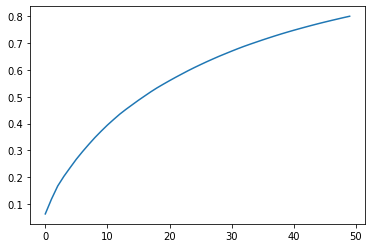

In [207]:
model = PCA(n_components=50)
model.fit(temp3)
plt.plot(np.cumsum(model.explained_variance_ratio_))

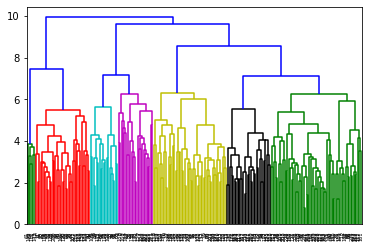

In [208]:
from scipy.cluster.hierarchy import ward, dendrogram
plt.figure()
dendrogram(ward(temp3))
plt.show()

In [210]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage

In [211]:
Z = linkage(temp3, 'ward')

In [212]:
c, coph_dists = cophenet(Z, pdist(temp3))
c

0.36115950977428785

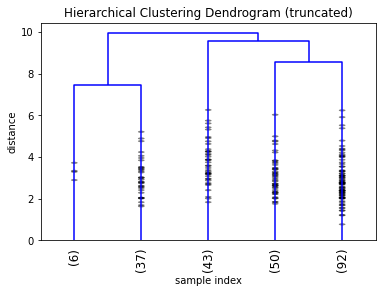

In [223]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=5,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

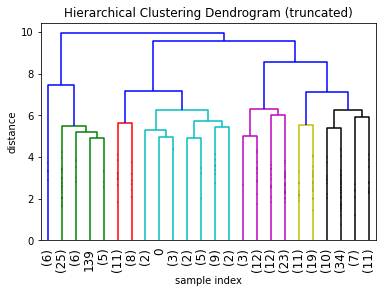

In [217]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=24,  # show only the last p merged clusters
    show_leaf_counts=True,  # otherwise numbers in brackets are counts
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [224]:
from scipy.cluster.hierarchy import fcluster

In [225]:
clusters5 = fcluster(Z, 5, criterion='maxclust')

In [226]:
clusters5

array([3, 3, 5, 3, 2, 4, 3, 3, 4, 4, 4, 2, 5, 5, 5, 4, 4, 5, 5, 5, 2, 3,
       4, 2, 2, 3, 2, 5, 4, 4, 5, 2, 2, 5, 5, 4, 3, 2, 5, 3, 2, 4, 3, 5,
       2, 2, 3, 5, 2, 2, 4, 2, 2, 2, 4, 3, 2, 4, 3, 2, 5, 1, 5, 3, 4, 3,
       2, 5, 3, 5, 3, 4, 5, 4, 2, 5, 1, 5, 3, 5, 4, 5, 3, 4, 1, 5, 3, 4,
       5, 3, 2, 3, 2, 4, 5, 2, 3, 4, 4, 5, 5, 2, 4, 5, 2, 4, 3, 4, 3, 4,
       5, 1, 5, 5, 5, 5, 2, 5, 2, 4, 2, 4, 5, 4, 2, 5, 3, 4, 2, 5, 3, 5,
       5, 3, 4, 3, 4, 4, 3, 2, 4, 5, 5, 1, 5, 4, 4, 5, 5, 1, 3, 5, 5, 3,
       4, 4, 3, 5, 5, 4, 2, 5, 4, 5, 3, 5, 3, 5, 5, 5, 4, 5, 5, 5, 5, 5,
       5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 2, 5, 3, 3, 5, 3, 4, 5, 4, 5, 3, 4,
       4, 5, 2, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 5, 3, 5, 5, 3, 5, 5, 5,
       5, 3, 4, 4, 5, 3, 5, 2], dtype=int32)

In [227]:
trialpd = pd.DataFrame(Ids282InReviews)

In [228]:
trialpd['clusters'] = clusters5

In [229]:
trialpd

,0,clusters
0,kPDxpJZ8PD,3
1,RLlDWHh7hR,3
2,i5Oqu5VZgP,5
3,yqR4PtpO8X,3
4,5H5JS0KLzK,2
...,...,...
223,lxkP1zX037,4
224,E5TYKwLTf0,5
225,qgFaBUwBnD,3
226,EvYzPCnCGG,5


In [234]:
cn = ['ids','clusters']
trialpd.columns =cn

In [236]:
FinalReviewSet.head()

,description,id,rating,title,clusters
0,"Very clever mechanics and ""paranoia"" type of g...",YIBcOZqGkI,3,Very cleve...,3.0
1,"Fun, but just a bit too long for my liking.",YIBcOZqGkI,3,"Fun, but j...",3.0
3,"[SOLD, June 2017]Revised rating up from a 7 th...",YIBcOZqGkI,4,"[SOLD, Jun...",3.0
4,First game seemed a bit lopsided with humans w...,YIBcOZqGkI,3,First game...,3.0
5,An excellent experience in board gaming! Becau...,YIBcOZqGkI,4,An excelle...,3.0


In [238]:
FinalReviewSet.clusters.unique()

array([3., 4., 5., 2., 1.])